# **1. Seleksi Unvariate**

---


Metode paling sederhana dan tercepat didasarkan pada uji statistik univariat. Untuk setiap fitur, ukur seberapa kuat target bergantung pada fitur menggunakan uji statistik seperti χ2 (chi-square) or ANOVA.

Uji statistik dapat digunakan untuk memilih fitur-fitur tersebut yang memiliki relasi paling kuat dengan variabel output/target. Library scikit-learn menyediakan class SelectKBest yang digunakan untuk serangkaian uji statistik berbeda untuk memilih angka spesifik dari fitur. Berikut ini adalah uji statistik chi-square utk fitur non-negatif untuk memilih 10 fitur terbaik dari dataset Mobile Price Range Prediction.

In [92]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [94]:
# memuat data
data = pd.read_csv("gpa_iq.csv")
data.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [95]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [97]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [98]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs       Score
0      obs  568.606862
4  concept  208.261310
2       iq   74.653496
1      gpa   31.598310
3   gender    6.019200


# **2. Feature Importance**

---
Feature importance mengacu pada kelas teknik untuk menetapkan skor ke fitur input ke model prediktif yang menunjukkan importance relatif dari setiap fitur saat membuat prediksi. Skor Feature importance dapat dihitung untuk masalah yang melibatkan prediksi nilai numerik, yang disebut regresi, dan masalah yang melibatkan prediksi label kelas, yang disebut klasifikasi.

Skor digunakan dalam berbagai situasi dalam masalah pemodelan prediktif, seperti:
*   Lebih memahami data.
*   Lebih memahami model.
*   Mengurangi jumlah fitur input.
*   memberi skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

Inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kami akan menggunakan Pengklasifikasi Pohon Ekstra untuk mengekstraksi 10 fitur teratas untuk kumpulan data

In [39]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [99]:
# memuat data
data = pd.read_csv("gpa_iq.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range


In [100]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.19748958 0.19842446 0.20283755 0.04017313 0.36107528]


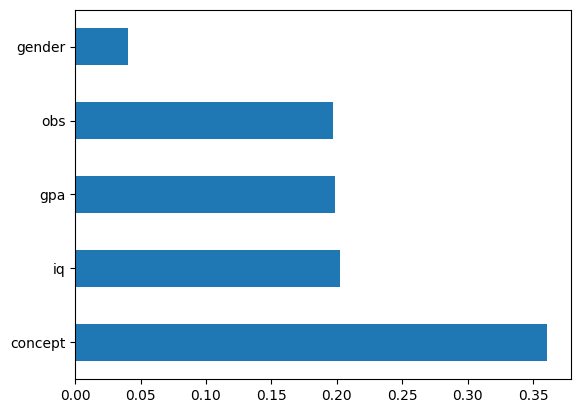

In [101]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# **3. Matriks Korelasi dengan Heatmap**

---

*   Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
*  Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
*  Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library


In [102]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [103]:
# memuat data
data = pd.read_csv("gpa_iq.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [104]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

# **Matriks Korelasi dengan Heatmap (lanjutan)**

---



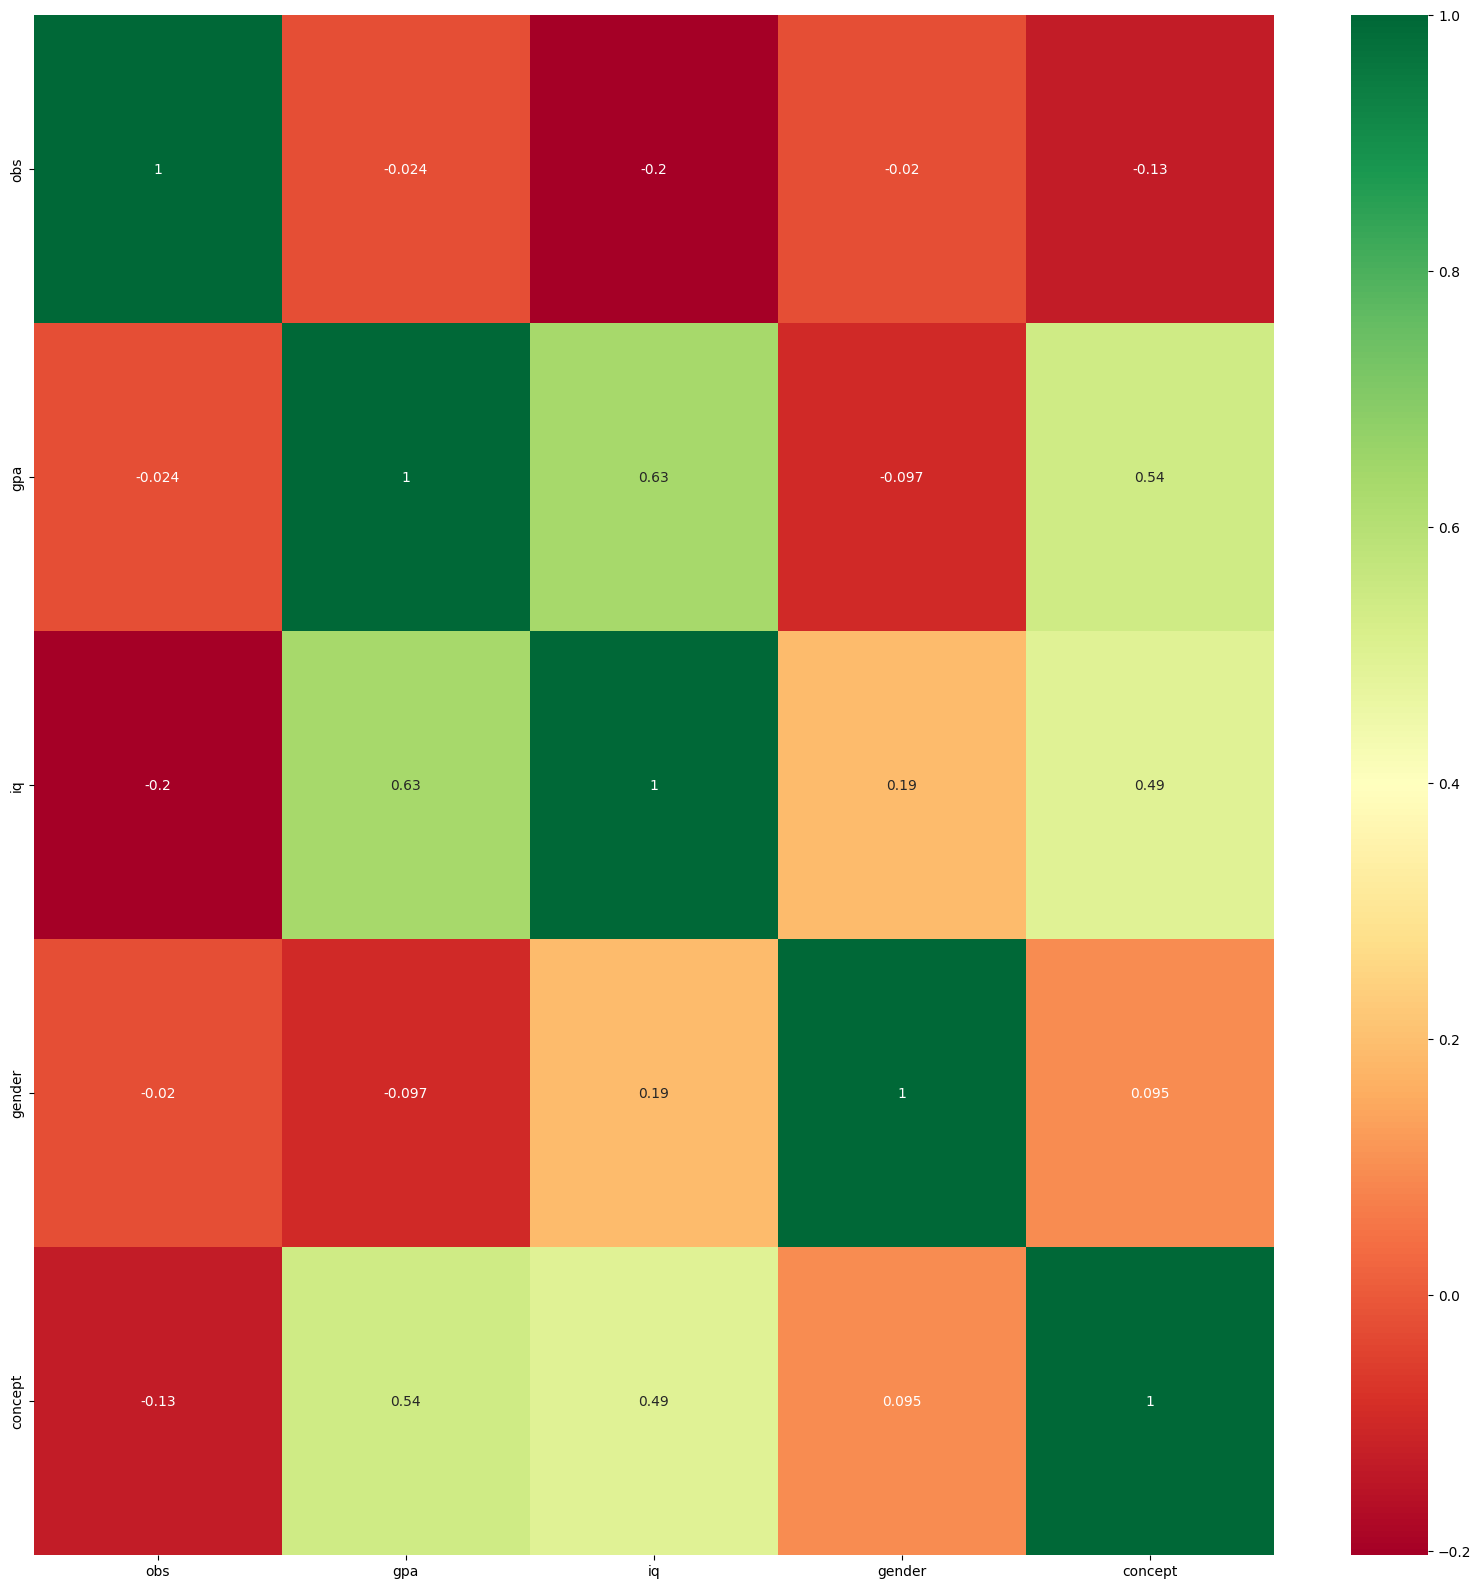

In [106]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Kesimpulan**
- Concept dan Obs (-0.13):
Korelasi antara "Concept" dan "Obs" adalah -0.13, yang menunjukkan korelasi negatif lemah antara kedua variabel ini. Artinya, ketika nilai "Concept" meningkat, nilai "Obs" cenderung menurun dalam tingkat yang rendah.
- Concept dan GPA (0.54):
Korelasi antara "Concept" dan "GPA" adalah 0.54, yang menunjukkan korelasi positif kuat antara kedua variabel ini. Ini menandakan bahwa semakin tinggi nilai "Concept," semakin tinggi juga nilai "GPA" dengan kuat.
- Concept dan IQ (0.49):
Korelasi antara "Concept" dan "IQ" adalah 0.49, yang menunjukkan korelasi positif antara kedua variabel ini. Meskipun tidak sekuat korelasi antara "Concept" dan "GPA," masih ada hubungan positif yang moderat antara keduanya. Artinya, semakin tinggi nilai "Concept," semakin tinggi nilai "IQ" dengan sejumlah yang lebih moderat.
- Concept dan Gender (0.095):
Korelasi antara "Concept" dan "Gender" adalah 0.095, yang menunjukkan korelasi positif sangat lemah antara kedua variabel ini. Ini menandakan bahwa ada sedikit hubungan antara konsep dan jenis kelamin siswa, dan hubungan tersebut sangat lemah.
- Gender dan Obs (-0.02):
Korelasi antara "Gender" dan "Obs" adalah -0.02, yang menunjukkan bahwa tidak ada korelasi yang signifikan antara jenis kelamin (gender) dan variabel "Obs." Korelasi ini sangat dekat dengan nol, menunjukkan bahwa jenis kelamin tidak memiliki pengaruh yang signifikan terhadap variabel "Obs."
- Gender dan GPA (-0.097):
Korelasi antara "Gender" dan "GPA" adalah -0.097, yang juga menunjukkan bahwa tidak ada korelasi yang signifikan antara jenis kelamin (gender) dan variabel "GPA." Korelasi ini juga sangat dekat dengan nol, menunjukkan bahwa jenis kelamin tidak memiliki pengaruh yang signifikan terhadap variabel "GPA."
- Gender dan IQ (0.19):
Korelasi antara "Gender" dan "IQ" adalah 0.19, yang menunjukkan korelasi positif lemah antara jenis kelamin (gender) dan variabel "IQ." Artinya, ada sedikit hubungan positif antara jenis kelamin dan IQ, tetapi hubungannya lemah.
- IQ dan Obs (-0.2):
Korelasi antara "IQ" dan "Obs" adalah -0.2, yang menunjukkan korelasi negatif lemah antara kedua variabel ini. Artinya, ketika nilai "IQ" meningkat, nilai "Obs" cenderung menurun dalam tingkat yang lemah.
- IQ dan GPA (-0.63):
Korelasi antara "IQ" dan "GPA" adalah -0.63, yang menunjukkan korelasi negatif kuat antara kedua variabel ini. Ini menandakan bahwa semakin tinggi nilai "IQ," semakin rendah nilai "GPA" dengan kuat.
- IQ dan Concept (0.49):
Korelasi antara "IQ" dan "Concept" adalah 0.49, yang menunjukkan korelasi positif moderat antara kedua variabel ini. Artinya, terdapat hubungan positif yang sedang antara "IQ" dan "Concept." Semakin tinggi nilai "IQ," semakin tinggi juga nilai "Concept" dengan sejumlah yang lebih moderat.
GPA dan Obs (-0.024):
- Korelasi antara "GPA" dan "Obs" adalah -0.024, yang menunjukkan korelasi negatif sangat lemah antara kedua variabel ini. Artinya, tidak ada hubungan yang signifikan antara nilai "GPA" dan nilai "Obs." Korelasi ini sangat mendekati nol, menunjukkan bahwa perubahan dalam "GPA" tidak secara signifikan terkait dengan perubahan dalam "Obs."
